In [1]:
import logging
import numpy as np  
from gensim.models import Doc2Vec
import os
import codecs

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [2]:
import re 
import string
import unicodedata
import sys

STOPWORDS = [u"wwDATEww", u"wwTIMEww", u"wwEMAILww", u"wwIPww", u"wwURLww", u"wwNUMBERww"]

tbl = dict.fromkeys(i for i in xrange(sys.maxunicode)
                      if unicodedata.category(unichr(i)).startswith('P') and i != 45 and i!= 95)

def vi_trans_unicode(su):
    return su.translate(tbl)

vpunctuation = string.punctuation.replace('-','').replace('_','')
print vpunctuation

def vi_strip_text(s):
    s = re.sub(r"&amp;", "", s)
    s = re.sub(u"\u2026", "", s, re.UNICODE) # ...
    s = re.sub(u"\u2014", "", s, re.UNICODE) # emdash
    s = re.sub(u"\u201d", "", s, re.UNICODE) #
    s = re.sub(u"\u201c", "", s, re.UNICODE) #
    s = re.sub(r"<([^>]+)>", "", s)
    s = re.sub(r"(\s|\\n|\\r|\\t)+", " ", s)
    s = re.sub("([%s]+)" % vpunctuation, " ", s)
    s = ' '.join([w if not w[0].isdigit() else u"_NUM" for w in s.strip().split()])
    return s

def vi_strip_text2(s):
    s = re.sub(r"&amp;", "", s)
    s = vi_trans_unicode(s)
    s = re.sub(r"<([^>]+)>", "", s)
    s = re.sub(r"(\s|\\n|\\r|\\t)+", " ", s)
    s = re.sub(r"__+", "_", s)
    s = re.sub(r"--+", "-", s)
    s = ' '.join([w if not w[0].isdigit() else u"_NUM" for w in s.strip().split()])
    return s

def vi_clean(line):
    words = line.replace('.',' ').strip().split()
    words = [w for w in words if not(u"_NUM" in w) and not(w.startswith(u'-'))]
    return ' '.join(words)

def vi_clean2(line):
    words = line.replace('.',' ').strip().split()
    words = [w for w in words if not (w in STOPWORDS) and not(u"_NUM" in w) and not(w.startswith(u'-'))]
    return ' '.join(words)

!"#$%&'()*+,./:;<=>?@[\]^`{|}~


In [3]:
import requests
from bs4 import BeautifulSoup

url_post = "http://vlsp.vietlp.org:8080/demo/?page=seg_pos_chunk"
header_post = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/4",
    "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8"
}

def tokenize_soup(soup):
    try:
        sentences = soup.findAll('div', {'class': "sentence"})
        toks = [ s.find('tr').findAll('td')[1:] for s in sentences]
        toks = [t.contents[0] for tok in toks for t in tok]
        return ' '.join(toks)
    except Exception, e:
        print e
        
def get_tokens(INPUT):
    try:
        payload = {r"input":INPUT}
        rsp = requests.post(url_post, data=payload, headers=header_post)
        soup = BeautifulSoup(rsp.content)
        return tokenize_soup(soup)
    except Exception, e:
        print e

In [4]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [5]:
model = Doc2Vec.load("/home/laampt/orm/10K/5K/da_tok/model/docsent_tok_doc695K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r134")

INFO:gensim.utils:loading Doc2Vec object from /home/laampt/orm/10K/5K/da_tok/model/docsent_tok_doc695K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r134
INFO:gensim.utils:loading docvecs recursively from /home/laampt/orm/10K/5K/da_tok/model/docsent_tok_doc695K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r134.docvecs.* with mmap=None
INFO:gensim.utils:loading doctag_syn0 from /home/laampt/orm/10K/5K/da_tok/model/docsent_tok_doc695K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r134.docvecs.doctag_syn0.npy with mmap=None
INFO:gensim.utils:loading syn1neg from /home/laampt/orm/10K/5K/da_tok/model/docsent_tok_doc695K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r134.syn1neg.npy with mmap=None
INFO:gensim.utils:loading syn0 from /home/laampt/orm/10K/5K/da_tok/model/docsent_tok_doc695K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r134.syn0.npy with mmap=None
INFO:gensim.utils:setting ignored attribute syn0no

In [6]:
print model

Doc2Vec(dm/s,d200,n5,w8,mc2,s1e-05,t4)


In [7]:
model.init_sims(replace=True)

INFO:gensim.models.word2vec:precomputing L2-norms of word weight vectors


In [8]:
model.docvecs['r134_L9_800'].shape

(200,)

In [9]:
for w,v in model.most_similar([u"Ronaldo"]):
    print w, v

Messi 0.952404022217
Cristiano_Ronaldo 0.952042937279
Lionel_Messi 0.945017516613
Neymar 0.930627346039
Xavi 0.926064968109
Iniesta 0.924995481968
Sergio_Ramos 0.923401296139
Real_Madrid 0.921406745911
Aguero 0.918266355991
Casillas 0.917674303055


In [ ]:
for w,v in model.most_similar([u"ô-liu"]):
    print w, v

In [ ]:
for w,v in model.most_similar([u"phản_động"]):
    print w, v

In [ ]:
print model.docvecs['r134_WK_0'].shape
print model.docvecs['r134_L5_0'].shape
print model.docvecs['r134_ZN_0'].shape
print model.docvecs['r134_TN_0'].shape
print model.docvecs['r134_VN_0'].shape

In [ ]:
vn_127 = u"""Sau khi được mở_rộng cầu Bình Triệu sẽ góp_phần giảm áp_lực lưu_thông qua_cầu Sài_Gòn tăng nhanh khả_năng thông_thương giữa TP HCM và các tỉnh miền Đông_Nam_Bộ Cũng nằm trong dự_án BOT cầu_đường Bình Triệu _NUM cầu Bình Triệu mới đã được đưa vào sử_dụng cuối tháng _NUM và cho xe lưu_thông theo chiều từ Bình_Dương về TP HCM Ông Trần Quang Phượng Giám_đốc Sở Giao_thông vận_tải TP HCM đánh_giá cầu Bình Triệu sau gần _NUM năm khai_thác đã dần xuống_cấp và có nguy_cơ sập bất cứ lúc nào nên việc trùng_tu là hết sức quan_trọng Theo đó CII đơn_vị chủ đầu_tư đã thuê nhà_thầu nước_ngoài là Công_ty Freyssinet Pháp nâng_cấp cầu cũ từ tải_trọng _NUM tấn lên thành _NUM tấn với _NUM làn xe _NUM làn dành cho ôtô và một làn dành cho xe hai bánh Kiên_Cường Ảnh Kiên_Cường Dự_án BOT cầu_đường Bình Triệu _NUM được khởi_động vào ngày _NUM gồm xây_dựng cầu Bình Triệu mới và sửa_chữa mở_rộng cầu cũ nhưng vì một_số lý_do khách_quan nên mới chỉ xây được cầu mới Dự_kiến dự_án sửa_chữa sẽ hoàn_thành trong _NUM tháng và thời_gian khai_thác là _NUM năm với tổng giá_trị khoảng gần _NUM t đồng Đơn_vị thi_công cam_kết trong thời_gian làm mới các phương_tiện vẫn lưu_thông bình_thường ở _NUM cầu theo hướng cũ từ TP HCM đi Bình_Dương Chúng_tôi sẽ thay toàn_bộ khe co_giãn cùng các gối cầu trải lại lớp nhựa làm hệ_thống chiếu_sáng Cầu cũng được mở_rộng từ _NUM m lên_NUM m Đồng_thời cầu cũng sẽ có khả_năng chịu động_đất cấp _NUM sau khi hoàn_thành đại_diện Công_ty Freyssinet nói về phương_án k thuật sửa_chữa Hôm_nay chúng_tôi sẽ triển_khai việc sữa chữa nâng_cấp và mở_rộng cầu cũ ông Lê Vũ Hoàng Tổng giám_đốc Công_ty cổ_phần đầu_tư hạ_tầng k thuật TP HCM CII cho_biết"""
vn_127 = vi_clean(vn_127)
vn_127_vec = model.infer_vector(vn_127.split())
for tag,v in model.docvecs.most_similar([vn_127_vec]):
    print tag,v

In [ ]:
tn_127 = u"""Ý_định trồng ba_kích chợt lóe lên trong đầu người đàn_ông người C Tu này Ông nhiệt_tình cho giống hướng_dẫn cụ_thể cách trồng thu_hoạch với niềm_tin một ngày không xa sẽ có nhiều người miền_núi thoát nghèo vươn lên khá_giả đầy_đủ như mình Còn bây_giờ sau _NUM năm phát_triển và khá phổ_biến giá một ký ba_kích tươi đã lên đến _NUM đồng vậy mà còn không đủ để bán Ở xã Lăng nơi Bhríu Pố ở cũng đã có hơn _NUM gia_đình học_tập trồng ba_kích Ngoài dùng làm các vị_thuốc rượu ba_kích với nhiều tính_năng tuyệt_vời đã được nhiều người ưa_thích Hằng_ngày ông vẫn chân trần lội_suối vượt đồi để chăm_bẵm đồi ba_kích của mình Đằng_đẵng thời_gian dài đến lúc ba_kích lên tươi_tốt Bhríu Pố mới gọi bà_con đến xem Nhiều người vẫn nói quả đồi canh_tác của Bhríu Pố là đồi _NUM trong _NUM Lúc này mọi người mới tin cây của trời vẫn trồng được Mùa_thu hoạch ba_kích thường vào mùa_xuân tiết_trời mát Sau hơn _NUM năm gặp lại Bhríu Pố hào_hứng khoe đợt thu_hoạch vừa rồi ông trúng lớn Có hôm trời mưa nước lớn Bhríu Pố phải ngủ lại rừng Ông quyết_định vượt núi vào rừng đào ba_kích ròng_rã mấy tháng trời để về trồng TS Ngô Trại bảo đây là giống cây quý lắm có củ ở dưới người dân gọi là cây ruột gà Bây_giờ bất k ai đã từng đặt_chân đến vùng_đất Tây_Giang cũng đều cố_gắng có được một hũ rượu ba_kích mang về Với giá_thành hiện_tại chỉ làm một phép_tính sơ_sơ cũng đủ thấy đồi ba_kích của Bhríu Pố đang có giá_trị gần nửa tỉ đồng một giấc_mơ của nhiều người Làm_giàu nhờ trồng cây hiếm Thoát nghèo nhờ cây của trời _NUM Tôi Viết Chuyện Bhríu Pố giàu lên nhờ ba_kích loại cây quý_hiếm trong ngành dược_liệu VN trở_nên nổi_tiếng không chỉ ở Tây_Giang Quảng_Nam mà còn khắp các huyện miền_núi miền_Trung Chủ_tịch UBND huyện Tây_Giang Bhríu Liếc bộc_bạch Đất làm rẫy của người dân ngày_càng khó_khăn trong khi đó hiệu_quả kinh_tế của ba_kích thì thấy rõ nên huyện đã chủ_trương xác_định ba_kích sẽ là cây xóa đói giảm nghèo Năm _NUM lần đầu_tiên ba_kích tím được tìm thấy ở xã Lăng Tây_Giang Quảng_Nam trong chuyến đi thực_tế để tìm_kiếm các cây thuốc_nam của tiến_sĩ TS Ngô Trại Theo Giám_đốc Trung_tâm Y_tế huyện bác_sĩ Nguyễn Huy Thông huyện đã trồng được hơn _NUM gốc ở thôn PrNing Lúc trước khi ba_kích mới được tìm thấy một_vài người dân đi rừng đào được bán với giá _NUM đồng kg đến khi Bhríu Pố trồng được ba_kích giá đã nâng lên _NUM đồng kg Từ _NUM gốc ban_đầu hiện_nay số gốc ba_kích của Bhríu Pố đã lên đến hơn _NUM gốc Bhríu Pố nhớ như_in Mình cùng TS Ngô Trại lúc đang đi tham_khảo đất_nước rừng ở xã Lăng thì phát_hiện ra cây ba_kích ở trong một hốc núi Cả huyện trồng ba_kích Thấy mô_hình của Bhríu Pố hiệu_quả nhiều người dân kể_cả cán_bộ các huyện miền_núi khác như A_Lưới Thừa_Thiên_Huế Trà_My Nam_Giang Quảng_Nam đến học_hỏi Không chỉ trồng ươm giống tại hợp_tác_xã huyện Tây_Giang còn khuyến_khích người dân trồng loại cây này trên cơ_sở huyện sẽ cung_cấp giống miễn_phí gia_đình nào có _NUM ha ba_kích còn được thưởng _NUM triệu đồng Thậm chí họ còn bảo Bhríu Pố bị điên vì Đây là cây của trời mọc trong rừng chứ không phải của người không trồng được Nhưng khi bàn_bạc với mọi người trong thôn ai cũng phản_đối Bán tin bán nghi mình đào lên thì thấy có củ thật Ba_kích ưa bóng_râm nên trên đồi ba_kích Bhríu Pố trồng xen_kẽ cây sắn cau kiểng và cây ăn quả Qua tìm_hiểu sách_vở Bhríu Pố mới biết hết công_dụng tuyệt_vời của ba_kích"""
tn_127 = vi_clean(tn_127)
tn_127_vec = model.infer_vector(tn_127.split())
for tag,v in model.docvecs.most_similar([tn_127_vec]):
    print tag,v

In [ ]:
zn_127 = u"""Ngoài ra Mùa_xuân đầu_tiên còn có câu_chuyện của thế_hệ trẻ Việt_Nam hôm_nay những người chịu trách_nhiệm bảo_vệ hòa_bình và dựng_xây đất_nước khi nhớ lại những chiến_công hào_hùng của dân_tộc Ngày _NUM miền_Nam Việt_Nam hoàn_toàn được giải_phóng Mùa_xuân đầu_tiên là chương_trình nghệ_thuật đặc_biệt là khúc tráng_ca gửi đến biết bao thế_hệ người Việt_Nam đã anh_hùng chiến_đấu vì độc_lập và tự_do cho dân_tộc Câu_chuyện và cảm_xúc của các nhân_chứng trong chiến_tranh như phóng_viên chiến_trường Patrick Chauvel ông Trần Quang Cơ nguyên thành_viên phái_đoàn đàm_phán Hiệp_định Hòa_bình Paris Đại_tướng Lê Đức Anh cũng được chia_sẻ Chiến_tranh đã lùi xa đất_nước hòa_bình thống_nhất song ký_ức về những ngày_tháng hành_quân ra_trận cùng chiến_thắng hào_hùng của quân và dân ta trong Đại_thắng mùa_xuân _NUM vẫn luôn khắc sâu trong tim mỗi người Việt_Nam Chương_trình được tổ_chức tại hai đầu cầu Nhà thi_đấu Nguyễn Du TP HCM và Trường_quay ngoài_trời của Đài truyền_hình Việt_Nam tại Hà_Nội với sự tham_gia của nhiều nghệ_sĩ ca_sĩ nổi_tiếng như Trọng Tấn Văn Mai Hương Nguyên Thảo Uyên Linh Mùa_xuân đầu_tiên sẽ được phát_sóng trực_tiếp trên VTV_NUM vào lúc _NUMh ngày _NUM Truyền_hình VTV tổ_chức cầu truyền_hình k niệm Giải_phóng miền_Nam Nhân dịp k niệm _NUM năm giải_phóng miền_Nam thống_nhất Đất_nước Đài truyền_hình Việt_Nam thực_hiện cầu truyền_hình trực_tiếp _NUM miền_Nam Bắc mang tên Mùa_xuân đầu_tiên Ảnh AP Trong chương_trình khán_giả sẽ được gặp nhiều khách_mời là các chiến_sĩ cách_mạng những người từng đi qua chiến_tranh với biết bao xương_máu và nước mắt và cả nhiều người con xa quê_hương cố_gắng trở_về trong ngày độc_lập Bình_thường Thông_tin hữu_ích nội_dung không lỗi Thông_tin nhanh nội_dung trung_thực và khách_quan Kém Nội_dung không có giá_trị nhiều lỗi Non_sông Việt_Nam quy về một mối sau _NUM năm chia_cắt Bài_viết được cập_nhật lần cuối lúc _NUM Tiểu Uyên VTV_NUM Giải_phóng miền_Nam thống_nhất đất_nước ĐÁNH_GIÁ BÀI_VIẾT Giúp Zing vn ngày_càng nâng_cao chất_lượng nội_dung bằng cách cho chúng_tôi biết bạn đánh_giá thế nào về bài_viết này Rất tốt"""
zn_127 = vi_clean(zn_127)
print zn_127
print 
zn_127_vec = model.infer_vector(zn_127.split())
for tag,v in model.docvecs.most_similar([zn_127_vec]):
    print tag,v

In [ ]:
model.docvecs.most_similar([u"r134_L9_123"])

In [ ]:
new_doc = u"chúng_tôi là nhà đầu_tư chân_chính"
new_v = model.infer_vector(new_doc.split())
for w,v in model.docvecs.most_similar([new_v]):
    print w,v

## X,y

In [10]:
N_NUM = 800
pos_docs = []

with codecs.open("/home/laampt/orm/10K/5K/da_tok/tok/L9.privateLB_900doc_tok.l1.nodup", encoding="utf-8", mode="r") as fin:
    pos_docs = fin.readlines()
    
print len(pos_docs)

832


In [11]:
print pos_docs[-1]

đã gây ra bao khổ_đau cực_kỳ khốc_liệt cho toàn Dân và. đang quật mạnh lên mọi giá_trị cao_quí của Dân_tộc Việt. Lm TNLT Nguyễn_Văn_Lý. Sau khi tôi phổ_biến bài _wwNUMBERww_ LỜI_NÓI_DỐI VĨ_ĐẠI CẤP NHÀ_NƯỚC wwDATEww cố_ý gọn wwNUMBERww trang A4 cỡ wwNUMBERww font Unicode Times_New_Roman một_số độc_giả đề_nghị bổ_sung thêm một_số điều gian_dối cũng đẳng_cấp siêu_lừa của CSVN và nên để mở bài_viết mời tất_cả những ai có điều gì thì bổ_sung thêm các điều gian_trá tầm_mức vĩ_đại này đừng vội chấm_hết bài. Vì thế hôm_nay tôi mạn_phép bổ_sung thêm wwNUMBERww điều wwNUMBERww trang A4 hi_vọng Dân_nghèo vẫn nhân_bản được dễ_dàng. Kính_mời Quí_Vị rộng đường bổ_sung. Các Đức_Giám_mục Công_giáo hoàn_cầu wwNUMBERww năm wwNUMBERww lần về Rôma để viếng mộ wwNUMBERww Thánh Tông_Đồ Phêrô và Phaolô. Ngoài buổi gặp chung của Hội_đồng GM hoặc từng nhóm GM với Đức_Giáo_hoàng mỗi GM còn gặp riêng ĐGH để trình_bày về Giáo_phận mỗi GM coi_sóc mỗi Vị wwDATEww phút. Cuộc thăm_gặp này gọi là Ad Limina có nghĩa là

In [12]:
pos_posts = []
for i, raw in enumerate(pos_docs):
    if i % 100 == 0: print "[*] Progress ", i
    test_doc = vi_clean2(vi_strip_text2(raw))
    test_vec = model.infer_vector(test_doc.split())
    pos_posts.append(test_vec)
    
print len(pos_posts)

[*] Progress  0
[*] Progress  100
[*] Progress  200
[*] Progress  300
[*] Progress  400
[*] Progress  500
[*] Progress  600
[*] Progress  700
[*] Progress  800
832


In [13]:
neg_posts = []
PAD_NUM = 10000

for i in range(N_NUM):
    if i % 3 == 0:
        v = model.docvecs["r134_TN_{}".format(i + PAD_NUM)]
    elif i % 3 == 1:
        v = model.docvecs["r134_VN_{}".format(i + PAD_NUM)]
    else:
        v = model.docvecs["r134_ZN_{}".format(i + PAD_NUM)]
    size = v.shape
    if size[0] == 200: 
        neg_posts.append(v)
    else:
        pass
print len(neg_posts)

800


In [14]:
np.random.shuffle(pos_posts)
np.random.shuffle(neg_posts)

In [15]:
N_TRAIN = 600
X = np.vstack((np.array(pos_posts[:N_TRAIN]), np.array(neg_posts[:N_TRAIN])))
y = np.hstack((np.ones(N_TRAIN), np.zeros(N_TRAIN)))

print X.shape, y.shape

(1200, 200) (1200,)


In [16]:
X_test = np.vstack((np.array(pos_posts[N_TRAIN:]), np.array(neg_posts[N_TRAIN:])))
y_test = np.hstack((np.ones(len(pos_posts) - N_TRAIN), np.zeros(len(neg_posts) - N_TRAIN)))
print X_test.shape, y_test.shape

(432, 200) (432,)


## EDA

In [17]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn

from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

import seaborn as sns

In [18]:
columns = ["D_{:02d}".format(i+1) for i in range(200)]
df = pd.DataFrame.from_records(X, columns=columns)

In [19]:
df.head()

,D_01,D_02,D_03,D_04,D_05,D_06,D_07,D_08,D_09,D_10,D_11,D_12,D_13,D_14,D_15,D_16,D_17,D_18,D_19,D_20,D_21,D_22,D_23,D_24,D_25,D_26,D_27,D_28,D_29,D_30,D_31,D_32,D_33,D_34,D_35,D_36,D_37,D_38,D_39,D_40,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_57,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_67,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_85,D_86,D_87,D_88,D_89,D_90,D_91,D_92,D_93,D_94,D_95,D_96,D_97,D_98,D_99,D_100,D_101,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,D_146,D_147,D_148,D_149,D_150,D_151,D_152,D_153,D_154,D_155,D_156,D_157,D_158,D_159,D_160,D_161,D_162,D_163,D_164,D_165,D_166,D_167,D_168,D_169,D_170,D_171,D_172,D_173,D_174,D_175,D_176,D_177,D_178,D_179,D_180,D_181,D_182,D_183,D_184,D_185,D_186,D_187,D_188,D_189,D_190,D_191,D_192,D_193,D_194,D_195,D_196,D_197,D_198,D_199,D_200
0,0.067382,0.222113,-0.043010,0.038800,-0.042286,0.039701,-0.016208,0.189700,-0.115899,-0.328385,-0.039604,0.046062,0.104287,-0.093916,0.138686,-0.078858,0.163109,0.126933,0.095377,-0.062317,0.097231,-0.044962,0.075106,-0.108915,-0.067393,0.033358,-0.184644,-0.183174,0.022138,0.024387,0.085023,-0.070559,-0.122348,0.056467,-0.218537,-0.151368,0.026378,-0.250325,-0.124721,0.108409,-0.075851,-0.084472,-0.080968,0.152927,0.206478,0.111962,-0.265745,-0.024339,0.026036,0.075663,0.077808,-0.023752,0.072444,0.033236,0.086451,0.088344,-0.154465,0.080985,0.107874,-0.022271,-0.064735,-0.195231,-0.106416,0.002044,-0.056427,0.068715,-0.081264,0.024070,0.255865,-0.036328,-0.056558,-0.046505,0.033945,0.015485,0.084154,0.184760,-0.042162,0.177068,-0.128823,0.122222,-0.030993,-0.236946,-0.026689,0.000222,-0.195793,0.025760,-0.011163,0.171048,-0.075750,0.147240,0.213971,-0.123306,-0.089557,0.014246,0.025370,0.081564,-0.056957,0.136236,-0.195802,0.120126,0.004082,-0.055027,-0.089667,-0.152926,-0.012678,-0.199718,0.016817,0.020363,-0.198979,0.053700,-0.038203,-0.066655,0.052494,-0.103753,-0.032737,0.065854,-0.116487,0.117882,-0.157341,-0.184819,0.135827,-0.031181,0.109434,-0.082879,-0.080080,0.157073,0.158345,0.038027,-0.082044,0.079350,-0.228493,-0.145079,-0.065209,-0.101735,-0.200182,-0.230779,-0.009916,-0.014381,0.083387,0.103700,-0.175924,-0.079564,0.141976,-0.233714,0.016944,-0.114361,0.073009,0.154940,0.119411,-0.308443,-0.115686,0.182971,0.043213,-0.056024,-0.234421,0.055172,0.203743,-0.158564,0.150348,-0.133958,-0.007838,-0.129011,0.042664,-0.006494,0.090436,-0.149207,-0.014959,0.033989,0.036329,-0.080929,0.148911,0.078064,0.061388,0.179552,-0.088731,0.135785,-0.027207,0.081049,0.026307,0.242901,-0.195060,0.090480,-0.204640,-0.103310,-0.124681,0.118830,0.044734,0.331383,-0.342514,-0.055878,0.105810,0.202247,0.309967,-0.035222,-0.314220,-0.069436,0.107314,-0.002087,0.188162,-0.033185
1,-0.038249,0.055128,-0.044686,0.040594,-0.018783,-0.083793,0.033595,0.098457,-0.008430,-0.070865,-0.011576,-0.023105,-0.042735,0.021374,0.088300,0.010736,0.078943,0.056226,0.060094,-0.009382,0.028958,0.038958,0.064648,-0.088343,-0.043755,-0.005102,-0.060989,-0.023060,0.107613,0.010997,-0.047481,0.054661,-0.003110,0.003270,0.013365,-0.069016,0.007111,-0.118913,-0.035496,0.054786,0.035865,-0.045575,0.012187,0.061334,-0.059755,0.080107,-0.096480,-0.045608,-0.015748,0.012340,0.057386,-0.005172,0.031933,0.045620,0.008910,0.017139,-0.140666,-0.046071,0.050574,0.039750,0.041411,0.015745,-0.051267,-0.004385,-0.095887,0.001050,-0.045660,-0.073134,0.055605,-0.006508,-0.065511,0.039290,-0.072049,-0.018314,0.025951,-0.027143,-0.047345,0.003297,-0.008543,0.040043,-0.002652,-0.103069,0.103795,0.058041,-0.103845,-0.068427,0.026650,0.035703,-0.005092,0.034518,0.061655,0.023230,0.030631,0.008018,0.020364,0.006402,0.070333,-0.000200,0.013434,0.028750,0.016094,-0.131617,0.024516,-0.012612,-0.02782

In [20]:
df.describe()

,D_01,D_02,D_03,D_04,D_05,D_06,D_07,D_08,D_09,D_10,D_11,D_12,D_13,D_14,D_15,D_16,D_17,D_18,D_19,D_20,D_21,D_22,D_23,D_24,D_25,D_26,D_27,D_28,D_29,D_30,D_31,D_32,D_33,D_34,D_35,D_36,D_37,D_38,D_39,D_40,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_57,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_67,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_85,D_86,D_87,D_88,D_89,D_90,D_91,D_92,D_93,D_94,D_95,D_96,D_97,D_98,D_99,D_100,D_101,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,D_146,D_147,D_148,D_149,D_150,D_151,D_152,D_153,D_154,D_155,D_156,D_157,D_158,D_159,D_160,D_161,D_162,D_163,D_164,D_165,D_166,D_167,D_168,D_169,D_170,D_171,D_172,D_173,D_174,D_175,D_176,D_177,D_178,D_179,D_180,D_181,D_182,D_183,D_184,D_185,D_186,D_187,D_188,D_189,D_190,D_191,D_192,D_193,D_194,D_195,D_196,D_197,D_198,D_199,D_200
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.035897,0.158048,-0.030401,-0.026738,-0.064494,0.019504,0.029366,0.118816,-0.066523,-0.134385,0.005945,0.005598,0.003672,-0.001751,0.101496,-0.005445,0.100877,0.053975,0.048431,-0.005667,0.070933,-0.013677,0.073255,-0.072781,-0.052657,-0.010835,-0.043845,-0.058187,-0.026707,0.021631,-0.013327,-0.053060,-0.085815,-0.007241,-0.067409,-0.113052,0.026372,-0.065733,-0.137725,0.038536,-0.074648,-0.040930,-0.063272,0.057052,0.048293,0.070374,-0.145812,0.004520,0.033090,0.036774,0.072562,0

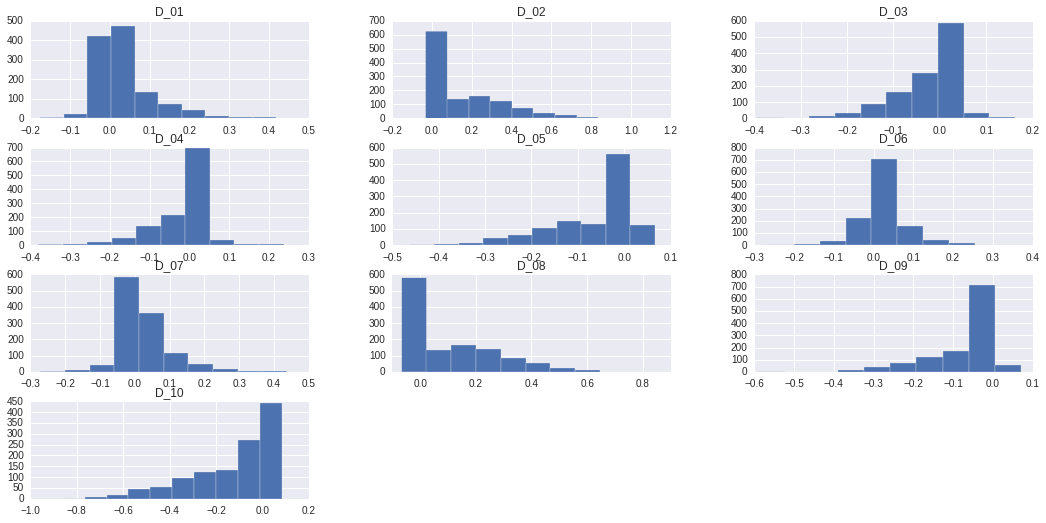

In [21]:
df[columns[:10]].hist(figsize=(16,8))
plt.show()

In [22]:
df['target'] = y

corr = df.corr()['target'][df.corr()['target'] < 1].abs()
corr.sort(ascending=False)
corr.head()

D_180    0.810618
D_71     0.775068
D_08     0.772310
D_15     0.770819
D_141    0.768838
Name: target, dtype: float64

## Viz

In [23]:
from tsne import tsne # See http://lvdmaaten.github.io/tsne/#implementations
import matplotlib.pyplot as plt

In [24]:
plt.style.use('fivethirtyeight')

_PLT_LEGEND_OPTIONS = dict(loc="upper center", 
                           bbox_to_anchor=(0.5, -0.15),
                           fancybox=True, 
                           shadow=True, 
                           ncol=3)
def tsne_viz(
        mat=None,
        rownames=None,
        indices=None,
        colors=None,
        output_filename=None,
        figheight=40,
        figwidth=50,
        display_progress=False): 
    """2d plot of mat using tsne, with the points labeled by rownames, 
    aligned with colors (defaults to all black).
    If indices is a list of indices into mat and rownames, 
    then it determines a subspace of mat and rownames to display.
    Give output_filename a string argument to save the image to disk.
    figheight and figwidth set the figure dimensions.
    display_progress=True shows the information that the tsne method prints out."""
    if not colors:
        colors = ['red' if rownames[i] == 'b' else 'blue' for i in range(len(rownames))]
    temp = sys.stdout
    if not display_progress:
        # Redirect stdout so that tsne doesn't fill the screen with its iteration info:
        f = open(os.devnull, 'w')
        sys.stdout = f
    tsnemat = tsne(mat)
    sys.stdout = temp
    # Plot coordinates:
    if not indices:
        indices = range(len(rownames))        
    vocab = np.array(rownames)[indices]
    xvals = tsnemat[indices, 0] 
    yvals = tsnemat[indices, 1]
    # Plotting:
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_figheight(40)
    fig.set_figwidth(50)
    ax.plot(xvals, yvals, marker='', linestyle='')
    ax.legend(**_PLT_LEGEND_OPTIONS)
    plt.title("10K points visualization")
    # Text labels:
    for word, x, y, color in zip(vocab, xvals, yvals, colors):
#         ax.annotate(word, (x, y), fontsize=8, color=color)
        ax.annotate('o', (x, y), fontsize=8, color=color)
    # Output:
    if output_filename:
        plt.savefig(output_filename, bbox_inches='tight')
    else:
        plt.show()

In [25]:
%matplotlib inline

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  1200 ...
Computing P-values for point  500  of  1200 ...
Computing P-values for point  1000  of  1200 ...
Mean value of sigma:  0.166593029089
Iteration  10 : error is  20.9007339242
Iteration  20 : error is  17.5652906528
Iteration  30 : error is  16.2105028097
Iteration  40 : error is  15.8083692043
Iteration  50 : error is  15.7283829954
Iteration  60 : error is  15.6976600206
Iteration  70 : error is  15.6472911591
Iteration  80 : error is  15.6101739539
Iteration  90 : error is  15.5773049103
Iteration  100 : error is  15.5742602828
Iteration  110 : error is  2.1203292402
Iteration  120 : error is  1.86524695782
Iteration  130 : error is  1.7153515681
Iteration  140 : error is  1.60920659903
Iteration  150 : error is  1.53242154094
Iteration  160 : error is  1.47438861907
Iteration  170 : error is  1.4286581773
Iteration  180 : error is  1.39186810718
Iteration  190 : error is 

/home/laampt/ds/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


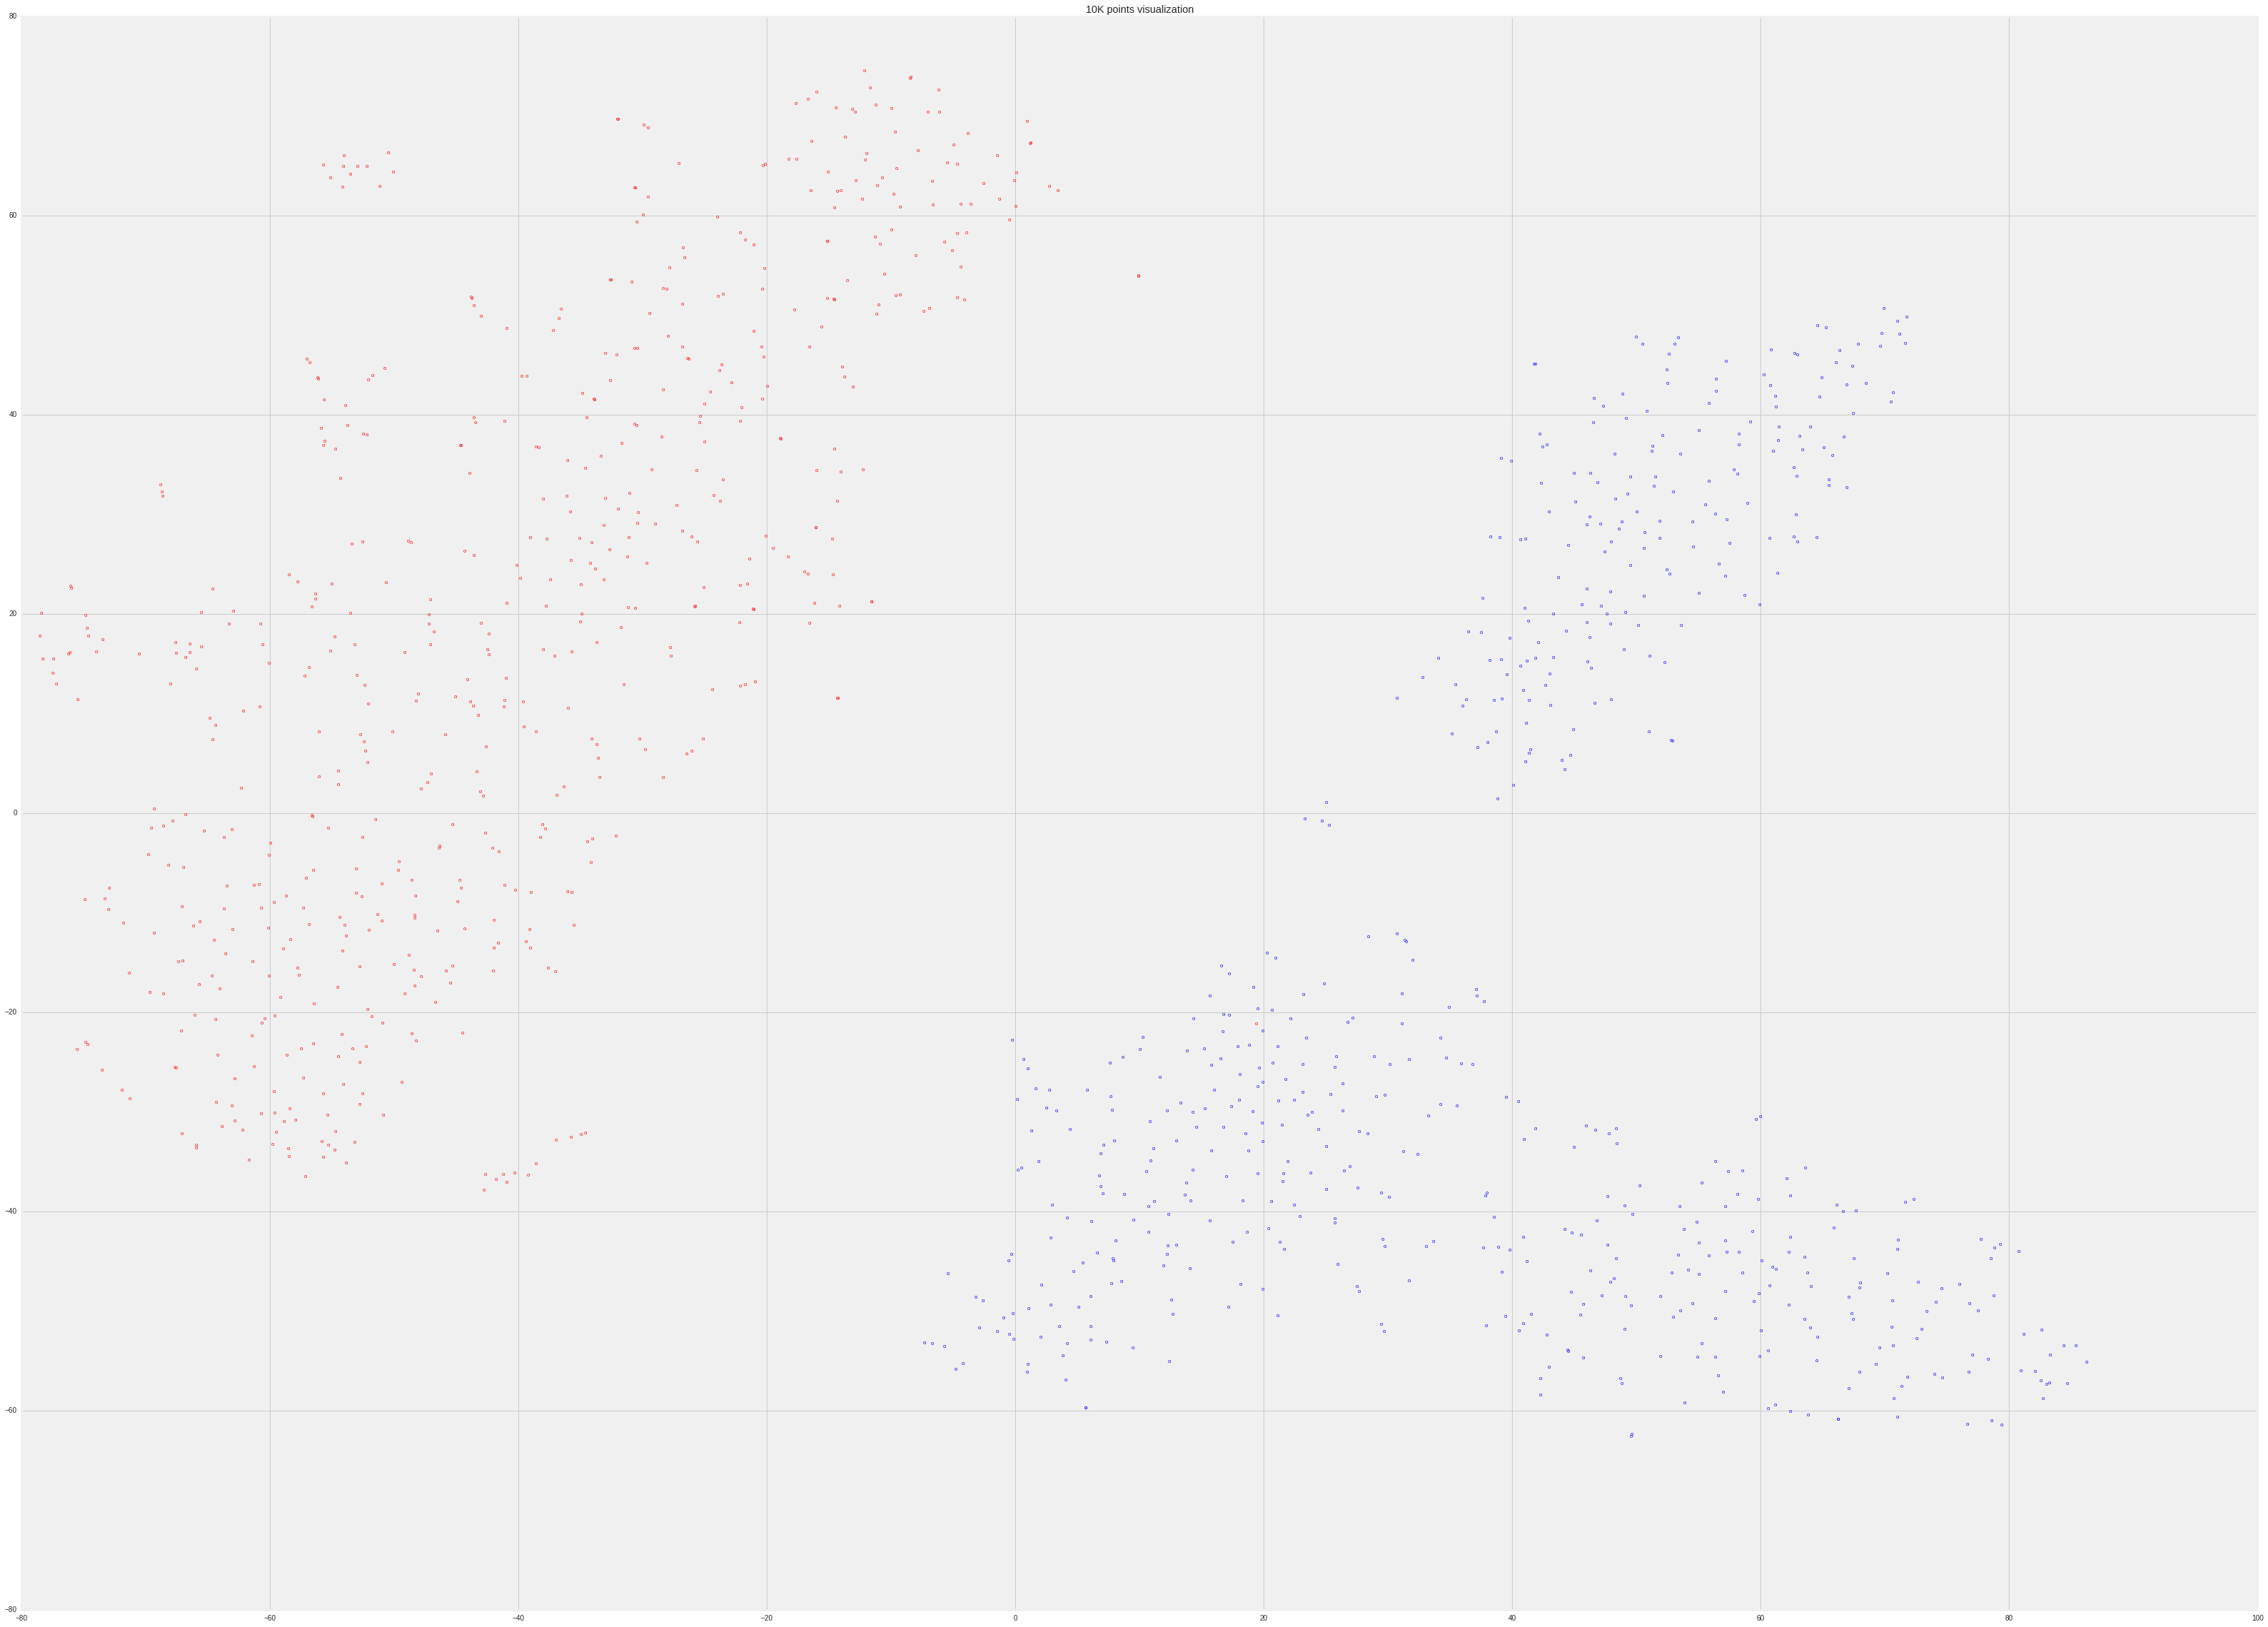

In [26]:
N_NUM2 = 2 * N_TRAIN

idx = range(N_NUM2)
target = ['b' if i < N_TRAIN else 'w' for i in idx[:N_NUM2]]
mat = np.asfarray(X[:N_NUM2, :])
tsne_viz(mat=mat, rownames=target, display_progress=True)

## Model

In [27]:
def stratified_cv3(X, y, clf, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return clf

> Train on X

In [28]:
lr = linear_model.LogisticRegression()
rf = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=127)
svc = svm.LinearSVC(random_state=127)

cls = [lr, rf, svc]
cls_names = ["Logistic Regression", "Random Forest", "Support Vector Machines"]

print "[*] CV on 10 folds"
for i, clf in enumerate(cls):
    print "CV on {}".format(cls_names[i])
    cls[i] = stratified_cv3(X,y, clf)

[*] CV on 10 folds
CV on Logistic Regression
CV on Random Forest
CV on Support Vector Machines


In [29]:
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, lr.predict(X))))
print('Random Forest:\n {}\n'.format(metrics.classification_report(y, rf.predict(X))))
print('Linear SVM:\n {}\n'.format(metrics.classification_report(y, svc.predict(X))))

Logistic Regression:
              precision    recall  f1-score   support

        0.0       0.99      1.00      0.99       600
        1.0       1.00      0.99      0.99       600

avg / total       0.99      0.99      0.99      1200


Random Forest:
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       600
        1.0       1.00      1.00      1.00       600

avg / total       1.00      1.00      1.00      1200


Linear SVM:
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       600
        1.0       1.00      1.00      1.00       600

avg / total       1.00      1.00      1.00      1200




In [30]:
print "[*] Score of CV on 10 folds"
for i, clf in enumerate(cls):
    print('{}:           {:.2f}\n'.format(cls_names[i], metrics.accuracy_score(y, cls[i].predict(X))))

[*] Score of CV on 10 folds
Logistic Regression:           0.99

Random Forest:           1.00

Support Vector Machines:           1.00



In [31]:
from sklearn.externals import joblib

In [32]:
joblib.dump(lr, "/home/laampt/orm/10K/5K/da_tok/model2/lr_1Ktrain_cv10_dim200_r134.pkl")
joblib.dump(rf, "/home/laampt/orm/10K/5K/da_tok/model2/rf_1Ktrain_cv10_dim200_r134.pkl")
joblib.dump(svc, "/home/laampt/orm/10K/5K/da_tok/model2/svc_1Ktrain_cv10_dim200_r134.pkl")

['/home/laampt/orm/10K/5K/da_tok/model2/svc_1Ktrain_cv10_dim200_r134.pkl',
 '/home/laampt/orm/10K/5K/da_tok/model2/svc_1Ktrain_cv10_dim200_r134.pkl_01.npy',
 '/home/laampt/orm/10K/5K/da_tok/model2/svc_1Ktrain_cv10_dim200_r134.pkl_02.npy',
 '/home/laampt/orm/10K/5K/da_tok/model2/svc_1Ktrain_cv10_dim200_r134.pkl_03.npy']

> Loading

In [33]:
lr = joblib.load("/home/laampt/orm/10K/5K/da_tok/model2/lr_1Ktrain_cv10_dim200_r134.pkl")
rf = joblib.load("/home/laampt/orm/10K/5K/da_tok/model2/rf_1Ktrain_cv10_dim200_r134.pkl")
svc = joblib.load("/home/laampt/orm/10K/5K/da_tok/model2/svc_1Ktrain_cv10_dim200_r134.pkl")

## Test

In [34]:
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y_test, lr.predict(X_test))))
print('Random Forest:\n {}\n'.format(metrics.classification_report(y_test, rf.predict(X_test))))
print('Linear SVM:\n {}\n'.format(metrics.classification_report(y_test, svc.predict(X_test))))

Logistic Regression:
              precision    recall  f1-score   support

        0.0       0.99      1.00      0.99       200
        1.0       1.00      0.99      0.99       232

avg / total       0.99      0.99      0.99       432


Random Forest:
              precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       200
        1.0       1.00      1.00      1.00       232

avg / total       1.00      1.00      1.00       432


Linear SVM:
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       200
        1.0       1.00      1.00      1.00       232

avg / total       1.00      1.00      1.00       432




## Sanity check

In [35]:
def voting_vec4(test_vec, cls):
    names = [type(clf).__name__ for clf in cls]
    scores = [clf.predict(test_vec) for clf in cls]
    return zip(names,scores)

In [36]:
INPUT = u"""Đừng dạy học_sinh nói_dối nữa. Chỉ có_một biện_pháp duy_nhất là tất_cả ngưng đọng_lại đâu đứng đó thay_đổi thể_chế bõ CS hay XHCN vì nó thất_bại hoàn_toàn bầu_cử tự_do để có người_tài đủ kiến_thức kinh_nghiệm và uy_tín với wwNUMBERww triệu đồng_bào ta thì mới vực_dậy KT và cuộc_sống của dân_tộc Khi một thể_chế mới lên thì tất_cả nợ loanh_quanh sẽ tự_nhiên phải khoanh lại người_người cố_gắng thu_nhập cho cuộc_sống mua_sắm cái mới tạo nguồn_cầu cho nền_kinh_tế phá_sản những NH ngoắc_ngoải dư tiền cho DN mới vay tích biên wwNUMBERww ngàn căn_hộ bán_rẻ cho dân với lãi_suất lock-in khoá lãi_suất cố_định CP bù_lỗ nếu lãi_suất tăng_cao sau_này và CP hưởng lãi_suất thặng_dư nếu lãi_suất thị_trường thấp hơn LS lock-in Dĩ_nhiên giải_thể tất_cả DNNN khuếch_trương công_thương để xuất_khẩu tất_cả những món hàng_xuất_khẩu phải qua stringent export quality control tức là tiêu_chuẩn xuất_khẩu cao để bảo_vệ thương_hiệu xuất_khẩu và chử Made in VN cùng lúc bảo_vệ một nồi_cơm lâu_dài cho dân_tộc ta. Từ những phát_triển KT sau wwNUMBERww năm chúng ta củng_cố quốc_phòng và lấy lại Hoàng_Sa. Cảnh_sát sẽ theo tiêu_chuẩn CS Úc Y_tế sẽ từ_từ giảm_bớt tình_trạng wwNUMBERww hay wwNUMBERww bệnh_nhân trg wwNUMBERww giuòng Y_tế_dự_phòng VSATTP là hàng_đầu để giảm_thiểu số người nhập_viện giáo_dục sẽ trở_lại như thời_kỳ VNCH nơi mà bằng_cấp của du_học_sinh dk thế_giới công_nhận tiếng_Anh là bắt_buộc vì đó là sự_phát_triển dân_trí khoa_học xã_hội kỹ_thuật an_ninh QP tất_cả đều dùng Anh_ngữ ngay cả Google cũng là Anh_Ngữ Cải_cách hành_chánh đuổi việc wwDATEww giử wwDATEww và tăng_lương gấp_đôi ai làm ko chạy_việc thì cho nghĩ vì có wwDATEww dự_bị quen_việc rồi dĩ_nhiên là thật_thà minh_bạch ko tham_nhũng và bắt_buộc phải đối_xử như công_chức là công_bộc người dân ko hơn ko kém tất_cả ý_tưởng quan_liêu cửa_quan cửa_quyền sẽ bị đập bỏ Về ngoại_giao sẽ nghiên về Mỹ nhưng không lệ_thuộc Mỹ như VNCH hồi_xưa hồi_xưa Mỹ_viện trở VN wwNUMBERww tỉ_usd nay GDP wwNUMBERww tỉ_usd nên chúng ta sẽ mua vũ_khí Mỹ tham_gia tham_chiến với wwNUMBERww vài tiểu_đoàn với Mỹ dần_dần tạo_lòng_tin để thành một_thành_viên của ANZUV- trở_thành ANVZUS cái này rất rất khó nhé được bảo_vệ an_ninh bời HK. Thiết_lập lại biên_giới Việt Hoa đem trở_lại hệ_thống Visa trục_xuất tất_cả những ai nhập_cảnh lậu lập phòng_thủ Hà_Nội và phía_bắc VN dùng wwNUMBERww tàu Kilo tuần tiểu cùng với HK Su-33 Mk2 wwNUMBERww chiếc sẽ đóng ở Đà_Nẵng và Nội_Bài có thể Hải_Phòng - An_sinh_xã_hội thì sẽ có thất_nghiệp lương_hưu cho bất cứ ai trên wwNUMBERww ko phân_biệt đảng_phái sẽ ko còn cảnh màn_trời_chiếu_đất Khoa_học kỹ_nghệ sẽ dựa trên phát_triển KT công_thương chứ ko hàn_lâm tất_cả hổ_trợ công_thương xuất_khẩu. NHNN sẽ độc_lập với CP họ sẽ điều_phối lãi_suất tỉ_giá để thay_đổi theo tình_hình KT phát_triển wwNUMBERww theo kiểu thắ chặt và thả_ra theo dự_đoán wwNUMBERww hay wwNUMBERww năm để ko giật_cục VN là một nước nông_nghiệp sẽ ko còn TCT thực_phẩm thu mua_lúa giá_rẻ bán qua cty sân_sau ở Sing rồi cty sân_sau bán_lại lãi gấp mười cho thị_trường_thế_giới. CP HCS sẽ lập hiệp_hội xuất_khẩu_gạo do chủ DN bầu ra và CP sẽ giúp xuất khảu qua ĐSQ cho những hiệp_hội như thế này VN phải xuất khảu hàng_đầu và nông_dân phải có cuộc_sống ít nhất bằng ng thành_thị ở Úc nông_dân là loại rất giàu vì họ lập_hội lúa_mì gạo và họ tự định_giá mỗi tấn XK trích vài aud để hiệp_hội hoạt đọng đính giá xuất_khẩu vô vụ_lợi như The Australian Wheat Board HH Lúa_mì Ricegrowers Association of Australia Bộ_Kế_Hoạch_và_Đầu_tư sẽ dẫn_đầu bởi một BT có đầy_đủ kinh_nghiệm và kiến_thức như TS Alan_Phan người đọc dc suy_nghĩ của nhà_đầu_tư ngoại_quốc biết họ muốn làm gì nghề gì xuất_khẩu đi_đâu điều_kiện nhân_công thế nào tỉnh nào có_lợi thế nhất vận_tải thành_phẩm và nguyên_liệu như_thế_nào Những thằng đầu_đất như Bùi_Quang_Vinh thì chỉ đáng xách dép cho những người_bảo_vệ hay làm_vệ_sinh của Bộ KH và ĐT của CP HCS Một thằng đáng xách dép cho bảo_vệ Bộ GT là Đinh_La_Thăng Sẽ nghiên_cứu và nếu có tiền sẽ làm đường_sắt khổ rộng đồng_nhất cho VN đường_xá cầu_cống sẽ đấu_thầu tư_nhân từ A tới Z Tư_vấn_giám_sát bước_đầu là ngoại_quốc hay cty VN chỉnh_chu ko móc ngoạc nhà_thầu v v Dẹp hết những cty cầu_đường của BGT VT Bộ_Xây_Dựng cũng phải rất tinh_tường về nhu_cầu của nhưng building công_cộng có thể trách_nhiệm điện_lạnh bảo_trì và xây dụng những bld mới của công_sở quản_lý_nhà chính_phủ cho_thuê v v Bộ_Tài_nguyên môi_trường sẽ tách ra thành wwNUMBERww Bộ là Môi_Trường Khoáng_sản và Đất_đai. KS sẽ giám_sát cty tư_nhân khai_thác đồng chì dầu_mỏ than titanium Tungsten v v. Bộ MT sẽ có nhiệm_vụ rất cao là giữ môi_trường như của Úc Dept of Environment. Bộ đất_đai sẽ trách_nhiệm lưu trử tất_cả nhưng tài_liệu sở_hữu đất sẽ trả_đất cho dân oan và nhà_nước ko quản_lý_đất_đai nữa sẽ ko còn chuyện quyền_sử_dụng_đất mà chỉ còn là quyền_sở_hữu đất như Úc thôi Bộ LĐ TBXH sẽ lo QĐ về_hưu tàn_phế ko kể CS hay VNCH Bộ thông_tin sẽ hoàn_toàn báo tư_nhân nhưng sẽ giới_hạn chứ ko là wwNUMBERww tờ_báo. Đài TH sẽ như Úc một đài của CP ko lấy quảng_cáo thương_mại vì giá_quảng_cáo rất dễ che_giấu ko có_giá thị_trường người_Úc rất kỹ CP ko bao giờ dính vào những gì mà từ ngoài nhìn vào ng ta có thể tố_cáo tham_nhũng Bộ VHTTDL sẽ phải quảng_bá hình_ảnh du_lịch VN với Úc gần nhiều tiền sẽ ngày_càng tăng thị_phần so với Bali nhưng chúng ta phải hiếu_khách môi_trường tốt ko chặt_chém giúp đở nhỏ_nhặt nếu ko là bộ_phận giá của tour và dĩ_nhiên BT phải rành về sở_thích của khách_du_lịch quảng_bá hình_ảnh du_lịch của VN CS ko ăn_hối_lộ v v Đó là vài_điều suy_nghĩ về một VN tương_lai mà bây_giờ tôi ko ngại đăng ko ngại CS bắt_chước vì chúng sắp sập rồi còn gì nữa để chúng cải_cách. Với một_người lãnh_đạo_mới một ê-kíp có cùng khả_năng nguyện_vọng phục_vụ có thành_tích quản_lý KT thì tôi tin_rằng wwNUMBERww triệu người sẽ hưởng_ứng và cúng nhau xây_dựng lại một tương_lai VN ấm no công_bình bác_ái thịnh_vượng và văn_minh Trong khi chờ_đợi chúng ta vẫn phải ngưng đóng thuế Melbourne wwDATEww Châu Xuân Nguyễn. Lý_do chây_ì thuế - Tất_cả wwNUMBERww triệu dân hãy siết_chặt thòng_lọng vào cổ bọn cộng nô này chúng sắp_chết rồi đấy. Hãy ngưng đóng thuế và tìm những giọng_điệu thật thuyết_phục như buôn_bán ế ẫm hàng_tồn_kho như núi cung_cấp cho DN A B C D v v chúng nó chây_ì wwNUMBERww tháng nay rồi không_có_tiền đi_chợ ngày_mai cho sấp nhỏ v v tiền mặt_bằng thiếu wwNUMBERww tháng rồi đtdđ tắt luôn luôn vì nợ NH vây quá rát Có bắt tôi thì tôi chịu chứ tôi hết_tiền đóng thuế rồi Bắt tôi lại khoẻ ko chủ_nợ nào kiếm tôi và gia_đình tôi để đòi nợ nữa cp wwNUMBERww Dũng này làm KT khủng_hoảng từ wwNUMBERww đến bây_giờ vậy chú ở trong ngành thuế chú có biết bao lâu buôn_bán phát_đạt trở_lại hay không vậy chú nói cho tôi mừng. Đồng_bào và DNNVV cứ viện lý_do là kinh_tế khủng_hoảng từ wwDATEww đến giờ sức_mua_yếu tồn_kho như núi trả_lãi ngân_hàng còn không nỗi chính đồng_bào phải có nợ_xấu với NH trả_lãi định_kỳ không nổi đồng_bào ước gì NH lại phát_mãi BĐS thế_chấp của mình cho yên_thân bán buôn ko được gì cả mà thuế mặt_bằng cả wwNUMBERww wwNUMBERww loại phí chồng_chất bôi_trơn tham_nhũng tiền không_có trả lương cho thợ thầy nợ mỗi ng mấy chục_triệu mặt_bằng thì ko biết chủ đuổi_đi lúc nào tiền chợ cho vợ_con còn không_có thì lấy cái gì mà đóng thuế có cái này đóng thuế dc không. được thì tôi cắt ra để đóng thuế. Sử Nhật_Bản Nhật bại trong chiến_tranh nhưng thắng trong hòa_bình. Đảng dạy rằng Mỹ chiếm miền_Nam làm thuộc_địa. Chính_quyền miền_Nam là bù_nhìn để cho dân miền_Nam đau_đớn dưới gót giầy xâm_lược. Thế là những thế_hệ cuồng_tín tử_vì_đạo ở miền_Bắc quê_hương_tôi đã tầng tầng_lớp lớp xẻ dọc Trường_Sơn vào Nam cứu_nước. Đảng lại phong cho họ một mỹ danh nhân_dân anh_hùng cộng với những lời hứa_hão. Thế là những tín_đồ thi nhau nhảy vào những thung_lũng tử_thần chém_giết đồng_loại mà có mấy khi dừng_tay để tự_vấn_lương_tâm - Tổng_thống Reagan Chấm_dứt chiến_tranh_Việt_Nam không đơn_thuần là chỉ rút_quân về_nhà là xong. Vì lẽ cái giá phải trả cho loại hòa_bình đó là ngàn năm tăm_tối cho những thế_hệ sinh_ra tại_Việt_Nam về sau - Lê Duẩn tuyên_bố wwNUMBERww Chúng ta sẽ đuổi_kịp Nhật trong wwNUMBERww wwNUMBERww năm và nhân_dân ta sẽ đi trên thảm vàng Đỗ Mười Có đảng_Cộng_Sản mới có đổi_mới Lê Khả Phiêu Trung_Quốc thành_công thì chúng ta cũng thành_công - Dùng vũ_lực cướp lấy chính_quyền xác_lập chế_độ_độc_tài toàn trị. Đó là khởi_thủy của đảng_Cộng_Sản. Cướp lấy mồ_hôi xương_máu của dân chặn lấy yết_hầu chỉ_để dân sống cầm_hơi sau đó bắt họ phải_biết ơn đảng Đó là phương_thức xưa_nay của đảng_Cộng_Sản. Làm cho cả dân_tộc phải đói_khổ phát_chẩn cứu_đói lấy_lệ rồi tuyên_truyền rộng_rãi. Đó là công_đức xưa_nay củađảng Cộng_Sản - Đảng_Cộng_Sản tuyên_truyền rằng Nếu như không_có Bác Hồ thì đất_nước ta không_có thái_bình ngày hôm_nay. Trời_đất ơi wwNUMBERww năm chiến_tranh mà Đảng gọi là thái_bình sao. Mấy triệu xương_máu của đồng_bào đã hy_sinh để có_một chế_độ_độc_tài khốn_kiếp thế này sao. Khi xây_dựng chủ_nghĩa_Cộng_sản họ nói là để có_một xã_hội bác_ái không còn cảnh người bóc_lột người. Vậy mà Đảng_Cộng_sản đã phân_biệt giai_cấp và ý_thức_hệ giết_hại hàng_triệu đồng_bào đưa đất_nước vào vòng bể_dâu. Họ thương_con người đến vậy sao. Cái khẩu_hiệu tối nghĩa mà từ khi họ đưa ra chưa_có nhà_thông_thái nào hiểu được Đảng lãnh_đạo nhà_nước quản_lý nhân_dân làm_chủ. Người dân bị đảng lãnh_đạo bị nhà_nước quản_lý thì không hiểu làm_chủ bằng cách_nào. - Rồi lại đến chuyện thời_bao_cấp. Theo đó thì nhà_nước quản_lý và lo tất_cả cho dân từ lương_thực cho đến cái kim sợi_chỉ. Mọi thứ đều phải chịu sự phân_phối của nhà_nước. Chuyện_ăn chuyện uống sự sống cái chết của dân đều do nhà_nước nắm giữ cả. Vậy thì nhà_nước như cha_mẹ còn gì. Vì vậy mà người dân luôn phải_biết ơn Đảng và Bác Hồ vĩ_đại. Thời này trong_dân gian sản_sinh_ra một câu_nói nổi_tiếng còn lưu_truyền đến ngày_nay Trông mặt như mất sổ gạo. Câu này để ám_chỉ những ai hốt_hoảng lo_sợ một_cái gì đó. Đó là tâm_trạng của một_người bị mất sổ gạo thời_bao_cấp Mất sổ gạo là bị cắt dạ_dày cả_nhà coi như chết_đói. Giải_thích Bài CXN -113011-1323 tức là bài_viết wwDATEww wwNUMBERww và số_thứ_tự bài là wwNUMBERww. Bài nào có dấu_sao là bài đăng lại wwNUMBERww. Đánh chử chây trong ngoặc_kép ở search trên đây để thấy những bài kêu_gọi chây lì đóng thuế."""
test_doc = vi_clean2(vi_strip_text2(INPUT))
test_vec = model.infer_vector(test_doc.split())
print voting_vec4(test_vec, [lr,rf,svc])

[('LogisticRegression', array([ 1.])), ('RandomForestClassifier', array([ 1.])), ('LinearSVC', array([ 1.]))]


In [37]:
INPUT = u"""Đây có thể xem như chiêu làm giá của Everton sau khi chứng kiến hàng thủ Chelsea liên tiếp mắc lỗi trong trận đấu gặp Man City. HLV Mourinho rất muốn có John Stones để cải thiện hàng thủ, vốn gồm các ngôi sao đã luống tuổi và kém tốc độ. Cách đây vài tuần, có nguồn tin Everton sẵn sàng bán John Stones giá 53 triệu đôla."""
test_doc = vi_clean2(vi_strip_text2(INPUT))
test_vec = model.infer_vector(test_doc.split())
print voting_vec4(test_vec, [lr,rf,svc])

[('LogisticRegression', array([ 0.])), ('RandomForestClassifier', array([ 0.])), ('LinearSVC', array([ 0.]))]


In [38]:
INPUT = u"""Tại sao chúng ta không nghiên cứu cách tuyển sinh của một nền giáo dục tốt nhất trong khu vực là Singapore? Hoặc tại sao chúng ta không tổ chức theo cách tương tự như ở Mỹ, theo đó việc xét tuyển vào đại học, cao đẳng do mỗi trường tự thực hiện, dựa trên kết quả thi sát hạch học sinh của các tổ chức đánh giá năng lực độc lập như SAT, ACT? Các cuộc thi này được tổ chức nhiều lần trong một năm, mọi học sinh kết thúc lớp 11 hoặc 12 đều có thể đăng ký thi, nhận kết quả và nộp hồ sơ vào bất kỳ trường nào để xin xét tuyển, không có bất kỳ giới hạn số lượng nguyện vọng nào. Chúng ta chưa có các tổ chức đánh giá độc lập như của Mỹ, thì vẫn có thể coi kết quả của kỳ thi chung là để cho các trường đại học, cao đẳng tự thực hiện phần tuyển sinh. Học sinh có thể sử dụng kết quả thi của mình để đăng ký tuyển sinh với bất kỳ trường nào có điều kiện tuyển sinh tối thiểu thấp hơn. Tại sao không áp dụng cách này và tạo tiền đề cho việc hình thành một tổ chức như SAT, ACT trong tương lai?"""
test_doc = vi_clean2(vi_strip_text2(INPUT))
test_vec = model.infer_vector(test_doc.split())
print voting_vec4(test_vec, [lr,rf,svc])

[('LogisticRegression', array([ 0.])), ('RandomForestClassifier', array([ 1.])), ('LinearSVC', array([ 0.]))]


In [39]:
INPUT = u"""Messi bắt đầu dự Siêu Cup Tây Ban Nha vào năm 2006 nhưng không ghi bàn nào vào lưới Espanyol khi đó. Cầu thủ này cũng không có bàn nào vào lưới Atletico Madrid trong hai trận tranh tài năm 2013."""
test_doc = vi_clean2(vi_strip_text2(INPUT))
test_vec = model.infer_vector(test_doc.split())
print voting_vec4(test_vec, [lr,rf,svc])

[('LogisticRegression', array([ 0.])), ('RandomForestClassifier', array([ 0.])), ('LinearSVC', array([ 0.]))]


## Eva

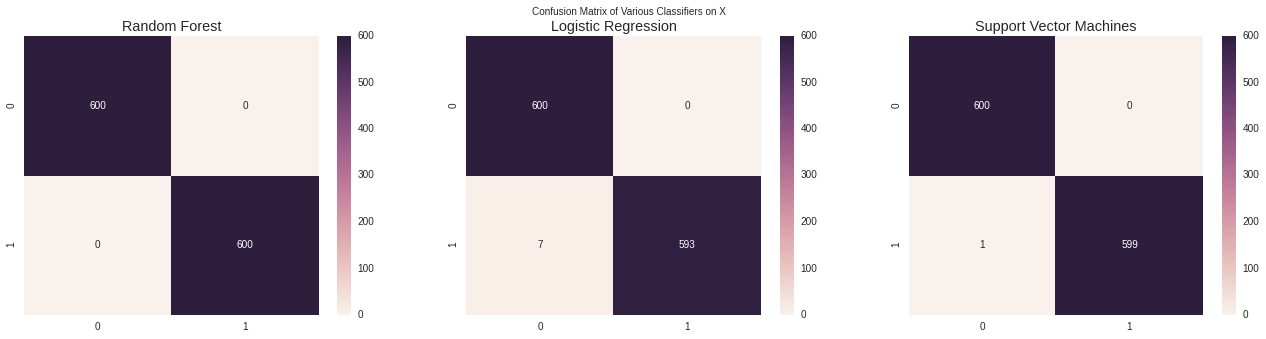

In [41]:
random_forest_conf_matrix = metrics.confusion_matrix(y, rf.predict(X))
logistic_reg_conf_matrix = metrics.confusion_matrix(y, lr.predict(X))
svm_svc_conf_matrix = metrics.confusion_matrix(y, svc.predict(X))

conf_matrix = {
                1: {
                    'matrix': random_forest_conf_matrix,
                    'title': 'Random Forest',
                   },
                2: {
                    'matrix': logistic_reg_conf_matrix,
                    'title': 'Logistic Regression',
                   },
                3: {
                    'matrix': svm_svc_conf_matrix,
                    'title': 'Support Vector Machines',
                   }
}

fix, ax = plt.subplots(figsize=(20, 5))
plt.suptitle('Confusion Matrix of Various Classifiers on X')
for ii, values in conf_matrix.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(1, 3, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');

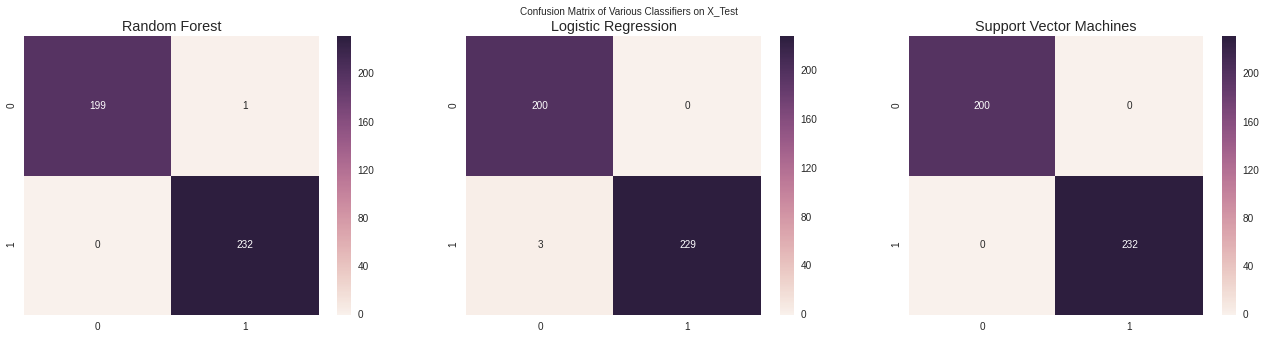

In [42]:
random_forest_conf_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
logistic_reg_conf_matrix = metrics.confusion_matrix(y_test, lr.predict(X_test))
svm_svc_conf_matrix = metrics.confusion_matrix(y_test, svc.predict(X_test))

conf_matrix = {
                1: {
                    'matrix': random_forest_conf_matrix,
                    'title': 'Random Forest',
                   },
                2: {
                    'matrix': logistic_reg_conf_matrix,
                    'title': 'Logistic Regression',
                   },
#                 3: {
#                     'matrix': grad_ens_conf_matrix,
#                     'title': 'Gradient Boosting Trees',
#                    },
                3: {
                    'matrix': svm_svc_conf_matrix,
                    'title': 'Support Vector Machines',
                   }
}

fix, ax = plt.subplots(figsize=(20, 5))
plt.suptitle('Confusion Matrix of Various Classifiers on X_Test ')
for ii, values in conf_matrix.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(1, 3, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');

In [43]:
print "AUC of LR: {}, RF: {}, SVC: {}".format(metrics.roc_auc_score(y_test, lr.predict(X_test)),
                                              metrics.roc_auc_score(y_test, rf.predict(X_test)),
                                              metrics.roc_auc_score(y_test, svc.predict(X_test))
                                             )

AUC of LR: 0.993534482759, RF: 0.9975, SVC: 1.0


## Testing on NEWSWIRE

In [44]:
def voting_vec3(test_vec, cls):
    names = [type(clf).__name__ for clf in cls]
    scores = [clf.predict(test_vec) for clf in cls]
    return zip(names,scores)

In [49]:
START_NUM = 50000
TEST_NUM = 1000
wrong_dim_count = 0

vne_posts = []
for i in range(START_NUM, START_NUM + TEST_NUM):
    if i % 3 == 0:
        k = "r134_VN_{}".format(i)
    elif i % 3 == 1:
        k = "r134_TN_{}".format(i)
    else:
        k = "r134_ZN_{}".format(i)
        
    v = model.docvecs[k]
    size = v.shape
    if size[0] == 200: 
        vne_posts.append((k,v))
    else:
        wrong_dim_count += 1

In [50]:
print wrong_dim_count
print len(vne_posts)

0
1000


In [51]:
results = []
for i, (k, vec) in enumerate(vne_posts[:1000]):
    if i % 100 == 0: print "[*] Vec ", k
    results.append(list(voting_vec3(vec, [lr,rf,svc])))

[*] Vec  r134_ZN_50000
[*] Vec  r134_VN_50100
[*] Vec  r134_TN_50200
[*] Vec  r134_ZN_50300
[*] Vec  r134_VN_50400
[*] Vec  r134_TN_50500
[*] Vec  r134_ZN_50600
[*] Vec  r134_VN_50700
[*] Vec  r134_TN_50800
[*] Vec  r134_ZN_50900


In [52]:
results2 = [(r[0][1][0], r[1][1][0], r[2][1][0]) for r in results]
results2[0]

(0.0, 0.0, 0.0)

In [53]:
df_result = pd.DataFrame.from_records(np.asarray(results2), columns=["LR", "RF", "SVC"])

In [54]:
df_result.describe()

,LR,RF,SVC
count,1000.000000,1000.000000,1000.000000
mean,0.001000,0.007000,0.001000
std,0.031623,0.083414,0.031623
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


## Testing on BLACK 800+

In [ ]:
final_800_posts = []

with codecs.open("/home/laampt/orm/10K/5K/da_tok/tok/L9.privateLB_900doc_tok.l1.nodup", encoding="utf-8", mode="r") as fin:
    final_800_posts = fin.readlines()
    
print len(final_800_posts)

In [ ]:
results = []
for i, raw in enumerate(final_800_posts):
    if i % 100 == 0: print "[*] Progress ", i
    test_doc = vi_clean2(vi_strip_text2(raw))
    test_vec = model.infer_vector(test_doc.split())
    results.append(list(voting_vec3(test_vec, [lr,rf,svc])))
    
results2 = [(r[0][1][0], r[1][1][0], r[2][1][0]) for r in results]
df_result = pd.DataFrame.from_records(np.asarray(results2), columns=["LR", "RF", "SVC"])
df_result.describe()

In [55]:
model.docvecs.most_similar([model[u"Vũ_Đức_Đam"]])

INFO:gensim.models.doc2vec:precomputing L2-norms of doc weight vectors


[(u'r134_WK_8923', 0.7427888512611389),
 (u'r134_VN_123994', 0.7318055629730225),
 (u'r134_VN_228517', 0.731219470500946),
 (u'r134_WK_4666', 0.7295688986778259),
 (u'r134_VN_215233', 0.7282679677009583),
 (u'r134_WK_6137', 0.7278282642364502),
 (u'r134_VN_186820', 0.727016806602478),
 (u'r134_VN_113399', 0.7243233919143677),
 (u'r134_WK_27594', 0.7242650389671326),
 (u'r134_WK_11303', 0.7238720059394836)]

In [56]:
for w,v in model.most_similar([u"Phùng_Quang_Thanh"]):
    print w,v

Tư_lệnh_Quân_khu 0.812996566296
Tổng_Tham_mưu_trưởng 0.812510550022
Tổng_tham_mưu_trưởng 0.806644558907
Lê_Hồng_Anh 0.804952442646
Thượng_tướng 0.792051196098
đại_tướng_Phùng_Quang_Thanh 0.791440248489
thượng_tướng 0.789197802544
Phó_Tư_lệnh 0.783110618591
Trung_tướng 0.782646358013
Phó_Chủ_nhiệm 0.778996288776


In [57]:
for w,v in model.most_similar([u"Nguyễn_Tấn_Dũng"]):
    print w,v

Nguyễn_Xuân_Phúc 0.86913138628
Phó_thủ_tướng_thường_trực 0.85795801878
Thủ_tướng_Nguyễn_Tấn_Dũng 0.847743034363
Phó_Thủ_tướng 0.847402870655
Thủ_tướng 0.846712291241
Phạm_Gia_Khiêm 0.8412540555
Nguyễn_Phú_Trọng 0.840469956398
Chủ_tịch_QH 0.838717401028
Trương_Tấn_Sang 0.837517738342
Nguyễn_Sinh_Hùng 0.835211753845


In [58]:
INPUT = u"""CHIA_SẺ CÙNG NHỮNG NGƯỜI DÂN KHU_PHỐ wwDATEww. CHIA_SẺ CÙNG NHỮNG NGƯỜI DÂN KHU_PHỐ wwDATEww. Sáng wwDATEww giáp ngày quốc hận ngày đau_thương tang_tóc của dân_tộc_Việt_Nam. Mấy chú hàng_phố gọi mời đi uống rươu sáng thưởng_thức món_đặc_sản biển_đảo_quê_hương ở wwNUMBERww phố Vũ Hữu Thanh_Xuân_Bắc Hà_Nội. Trần Thạch_Linh Thế là đủ cảm_nhận của người dân hiện_nay về wwDATEww rồi. Vậy ai là kẻ ăn_mừng chiến_thắng. Viết bình_luận. Sau khi chụp_ảnh bên tấm_biển và_các bài_thơ được ghi dưới tấm_biển đó tôi ngồi vào bàn rượu mãi suy_tư về tình_cảnh của đất_nước. Anh bạn_trẻ nói sao bác buồn ngồi_im không uống. Bởi tôi muốn hỏi các bạn trước khi nâng chén các bạn có cảm_nhận gì về nội_dung ghi trên tấm_biển cùng các bài_thơ và những gì thông_tin quốc_doanh tuyên_truyền về wwDATEww. Anh bạn_trẻ nói em biết ngay tâm trang của bác mà. Ông_già yêu nước ơi đừng coi_thường tụi em. Em nói cho bác biết nhé. bọn em còn đọc nhiều hơn biết nhiều hơn va_chạm trong cuộc_sống hàng ngày nhiều hơn các bác ấy chứ. Lấy đâu ra độc_lập làm gì có tự_do ở cái chế_độ_độc_tài đảng trị này. Nghe tivi nói về cái này cả_nhà em bảo tắt cái con M nó đi cho đỡ bực_mình. Chuyện này không phải mình gia_đình nhà em đâu nhé nhiều gia_đình hàng_xóm cũng vậy. Chỉ vì cuộc_sống mưu_sinh tạm_thời bất_lực nên đôi khi tụi em né_tránh sự_thật cũng nói cùn một_chút theo kiểu vô_tâm cảm đối với đất_nước thế thôi chứ trong lòng bọn em không thế đâu. Chính vì vậy mới mời bác ra quán này để nâng chén tiêu_sầu. Chứ có vui_vẻ gì đâu ăn_mừng gì cái ngày tà cộng thống_nhất sự cai_trị trên cả hai miền_nam bắc cái ngày đẩy đất_nước đến hiểm_họa đen_tối nhất trong lịch_sử hàng_triệu_người con của nước Việt lần_lượt phải rời_bỏ_quê_hương ra_đi sẵn_sàng chấp_nhận cái chết để đến với tự_do cho đến tận bây_giờ vẫn như thế anh ạ. Tất_cả chúng_tôi chia_sẻ và đều đồng_ý với nhau nguyên_nhân bất_hạnh và người dân bỏ nước ra_đi là do sự cai_trị hà_khắc trái_ngược tính nhân_văn của chế_độ độc đảng độc_tài. Vì cuộc_sống ở trong nước người dân bị áp_bức bót lột bị_cướp đoạt đủ các kiểu dưới nhiều hình_thức khác nhau luật_pháp chỉ là thứ trang_trí cho chế_độ kẻ cầm_quyền sẵn_sàng dẫm đạp_lên bất cứ lúc nào khi cái lý_sự cùn của họ không bịp được người dân sẵn_sàng dùng công_cụ côn_đồ trấn_áp và đẩy người dân vào chốn lao_tù xã_hội hiện đang là đỉnh_điểm của sự suy_đồi hiểm_họa mất nước đang cận_kề. Lại nghĩ đến chuyện treo_cờ. Nhiều dân_phố chia_sẻ những ngày này chúng_tôi có muốn treo_cờ máu đâu nhưng họ đến ép và gõ_cửa từng nhà rồi mang cờ đến cắm để yên_phận đành phải chiu. Nghe_nói đâu tổ_trưởng_dân_phố mua rất nhiều cờ_đỏ sao_vàng cả cờ đảng nữa giá wwDATEww vnd lá còn cọc thì wwDATEww vnd cọc về cắm cho các gia_đình và cắm cả ở sân khu_tập_thể nữa cắm như vậy những vẫn còn thừa nhiều lắm. Bọn này lấy tiền ở_đâu ra không_biết. Tôi đang viết đến đây thì thấy có người dân đi dưới đường_phố chửi cắm làm Đ gì cái cờ máu này mà cắm lắm thế lại còn cắm cả cờ đảng nữa chứ trông ngứa_mắt không_bỏ đi mai tao bẻ hết. Có người_đàn_ông đã từng là cán_bộ trong quân_đội về_hưu. Ông chia sẽ Biên_giới phía_bắc mất hàng_trăm km2 Hoàng_Sa bị Trung_cộng dùng vũ_lực đánh_chiếm wwNUMBERww Trường_Sa mất các đảo lớn và hiện Trung_cộng đang coi là sân_nhà làm sao có thể gọi là ngày_thống_nhất_đất_nước. Xã_hội quá bất_công người dân bất_hạnh khốn_khổ trăm_bề oan_khuất chồng_chất. Ông kể có hôm tôi bế cháu đi_chơi gặp một ông điên tầm ngoài wwNUMBERww ông ấy nói như điên nhưng ngẫm thì thật thấm_thía và sâu_sắc Ông ấy bảo đám trẻ chúng mày sống trong một_cái xã_hội như thế mà chúng mày sống được à. Tôi hỏi ông ấy vì_sao ông lại nói như vậy ông ấy nói ba lần tiễn_con đi hai_lần khóc_thầm lặng_lẽ. Con đi bộ_đội chết còn không dám khóc thành lời chỉ dám khóc_thầm. Thử hỏi làm gì có tự_do không_có tự_do thì làm gì có hạnh_phúc. Thế là đủ cảm_nhận của người dân hiện_nay về wwDATEww rồi. Vậy ai là kẻ ăn_mừng chiến_thắng. Tóm_lại Những người bình_thường ai cũng nhìn ra cái lỗi của cơ_chế cái lỗi_hệ_thống cái lỗi do người dân bị tước_đoạt những quyền căn_bản của con_người không_được chọn_ra người đại_biểu và người_lãnh_đạo của mình. Nhưng những cái lỗi ấy nó đem_lại đặc_lợi đặc_quyền bất chính cho cá_nhân cho tập_thể đang cai_trị đất_nước này. Đến ông Nguyễn_Văn_An nguyên chủ_tịch_quốc_hội cũng phải thừa_nhận chúng ta là vua tập_thể làm gì có dân_chủ có_một nghịch_lý đảng quyết_định tất_cả nhưng không_bao_giờ đảng chịu_trách_nhiệm lỗi_hệ_thống Bà Doan chủ_tịch_nước nói chúng nó ăn của dân không từ một thứ gì. Ấy thế mà cái đám con_hoang Trung_cộng cùng cái lũ nô truyền của cái đám con_hoang đó tổ_chức linh_đình ăn_mừng cứ ra rã trơ_trẽn đánh_bóng những danh_dự hảo_huyền vinh_quang nhí_nhố phải trả biết bao nhiêu xương_máu của nhân_dân một cách vô_ích nhưng vẫn cố_tình tuyên_truyền wwDATEww là ngày_chiến_thắng khoét_sâu vào nỗi hận_thù. Nhưng nỗi hận_thù này sẽ là nỗi hận_thù của nhân_dân_Việt_Nam đối với những nhà_cầm_quyền trong chế_độ CSVN đám con_hoang của Trung_Cộng chứ_không_phải nhà_cầm_quyền CSVN hận_thù ai cũng không phải nhân_dân miền_bắc hận_thù với chế_độ Việt_Nam Công Hòa với nhân_dân miền_nam như nhà cầm tưởng. Nếu thấy tôi nói_sai điều này thì thử hỏi nhà_cầm_quyền CSVN có dám trưng_cầu_dân_ý nhân_dân trong nước một cách khách_quan không. Tôi tin chắc_chắn là_không. Bởi sự_thật lịch_sử hận_thù này không phải do những nhà_lãnh_đạo Việt_Nam_Cộng_Hòa gây ra. Ở_đời anh gây ra đau_thương cho người khác anh lại nói anh hận_thù người ta thì thật là nực_cười. Cái hận_thù ngược_đời đánh_lận con_đen ấy chẳng qua cũng chỉ nhằm mục_đích duy tri kéo_dài câu_giờ để nắm giữ đặc_quyền_đặc_lợi bất chính mà thôi. Nhà_cầm_quyền thừa_biết người dân trong và ngoài nước hận_thù do những tội_ác họ gây ra như_thế_nào. Nếu thực_lòng muốn hòa_hợp_hòa_giải_dân_tộc. Đúng ra để cái hận_thù của người ta đối với anh giảm đi thì anh phải nhận ra lỗi_lầm biết xin_lỗi và trả lại phần_nào có thể trả được những gì anh đã gây ra. Đàng này anh lại khoét_sâu vào nỗi hận_thù và bấu_víu vào Trung_Cộng thì tất_yếu anh phải nhượng_bộ hết lần này đến lần khác và cứ thế dâng_hiến từng phần của Tổ_quốc cho ngoại_bang. Dù đám con_hoang của Trung_Cộng và lũ nô truyền có che_giấu bóp_méo_sự_thật bằng mọi cách_thức phương_tiện lấp_liếm lịch_sử đánh_tráo ngôn_từ làm cái phao rách để giữ cho chế_độ_độc_tài đang có nguy_cơ chìm_nghỉm. Thì sự_thật vẫn là sự_thật wwDATEww trước_sau vẫn là ngày QUỐC HẬN không thể khác."""
test_doc = vi_clean2(vi_strip_text2(INPUT))
test_vec = model.infer_vector(test_doc.split())
print voting_vec4(test_vec, [lr,rf,svc])

[('LogisticRegression', array([ 1.])), ('RandomForestClassifier', array([ 1.])), ('LinearSVC', array([ 1.]))]


## Grid Search

In [59]:
import itertools

colors = [ii.strip() for ii in '#30a2da, #fc4f30, #e5ae38, #6d904f, #8b8b8b'.split(',')]
colors += ['#' + ii.strip() for ii in '348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2'.split(',')]
markers = itertools.cycle(["o", "D"])
colors = itertools.cycle(colors)

In [60]:
# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [61]:
import numpy as np

from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# build a classifier
clf = RandomForestClassifier()

# specify parameters and distributions to sample from
param_grid = {
                'n_estimators': [12, 23, 35,58,93,151,180,200]
                }

# param_dist = {"max_depth": [3, 5, None],
#               "max_features": sp_randint(1, 15),
#               "min_samples_split": sp_randint(1, 15),
#               "min_samples_leaf": sp_randint(1, 15),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

GridSearchCV took 2.59 seconds for 8 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.999 (std: 0.001)
Parameters: {'n_estimators': 151}

Model with rank: 2
Mean validation score: 0.998 (std: 0.001)
Parameters: {'n_estimators': 35}

Model with rank: 3
Mean validation score: 0.998 (std: 0.001)
Parameters: {'n_estimators': 58}



[(12, 0.99583333333333335), (23, 0.99750000000000005), (35, 0.99833333333333329), (58, 0.99833333333333329), (93, 0.99750000000000005), (151, 0.99916666666666665), (180, 0.99833333333333329), (200, 0.99833333333333329)]


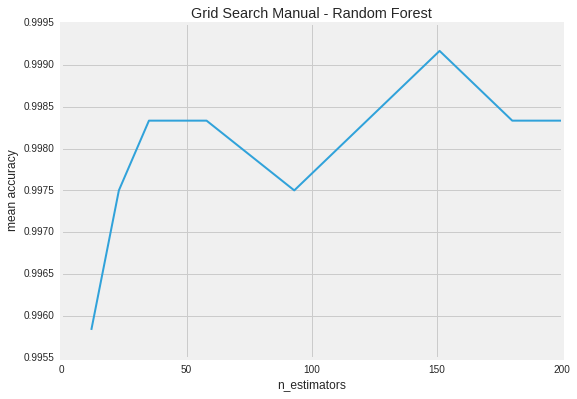

In [62]:
gs_scores = [(score.parameters['n_estimators'],score.mean_validation_score) for score in grid_search.grid_scores_]
print gs_scores
ns = [s[0] for s in gs_scores]
ss = [s[1] for s in gs_scores]
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.plot(ns, ss, linewidth=2, color=next(colors))

plt.xlabel('n_estimators')
plt.ylabel('mean accuracy')
plt.title('Grid Search Manual - Random Forest')
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# specify parameters and distributions to sample from
param_grid = {
                'C': [0.001, 0.01, 0.1, 1,10,20,100,100]
                }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

GridSearchCV took 1.01 seconds for 8 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.999 (std: 0.001)
Parameters: {'C': 10}

Model with rank: 2
Mean validation score: 0.999 (std: 0.001)
Parameters: {'C': 20}

Model with rank: 3
Mean validation score: 0.999 (std: 0.001)
Parameters: {'C': 100}



[(0.001, 0.98666666666666669), (0.01, 0.97916666666666663), (0.1, 0.97583333333333333), (1, 0.98916666666666664), (10, 0.99916666666666665), (20, 0.99916666666666665), (100, 0.99916666666666665), (100, 0.99916666666666665)]


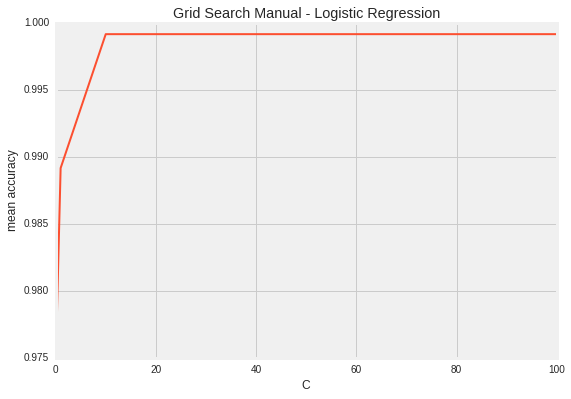

In [64]:
gs_scores = [(score.parameters['C'],score.mean_validation_score) for score in grid_search.grid_scores_]
print gs_scores
ns = [s[0] for s in gs_scores]
ss = [s[1] for s in gs_scores]

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.plot(ns, ss, linewidth=2, color=next(colors))
plt.xlabel('C')
plt.ylabel('mean accuracy')
plt.title('Grid Search Manual - Logistic Regression')
plt.show()

In [65]:
from sklearn.svm import LinearSVC
from time import time

clf = LinearSVC()
# specify parameters and distributions to sample from
param_grid = {
                'C': [0.001, 0.01, 0.1,0.5,1,1.5, 10,20,100,100]
                }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

GridSearchCV took 0.89 seconds for 10 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.999 (std: 0.001)
Parameters: {'C': 0.5}

Model with rank: 2
Mean validation score: 0.999 (std: 0.001)
Parameters: {'C': 1}

Model with rank: 3
Mean validation score: 0.999 (std: 0.001)
Parameters: {'C': 1.5}



[(0.001, 0.97583333333333333), (0.01, 0.97333333333333338), (0.1, 0.99333333333333329), (0.5, 0.99916666666666665), (1, 0.99916666666666665), (1.5, 0.99916666666666665), (10, 0.99916666666666665), (20, 0.99916666666666665), (100, 0.9966666666666667), (100, 0.99750000000000005)]


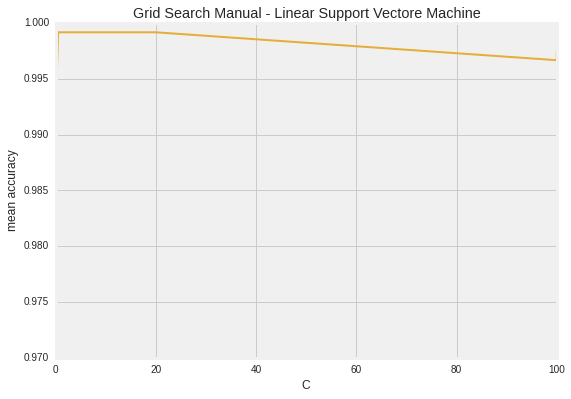

In [66]:
gs_scores = [(score.parameters['C'],score.mean_validation_score) for score in grid_search.grid_scores_]
print gs_scores
ns = [s[0] for s in gs_scores]
ss = [s[1] for s in gs_scores]

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.plot(ns, ss, linewidth=2, color=next(colors))
plt.xlabel('C')
plt.ylabel('mean accuracy')
plt.title('Grid Search Manual - Linear Support Vectore Machine')
plt.show()

In [67]:
%timeit model.infer_vector(test_doc.split())

100 loops, best of 3: 8.04 ms per loop
